In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px

plt.style.use('fivethirtyeight')
pd.set_option('display.max_column', 30)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

In [3]:
df = pd.read_csv('/fcai_db_cs251_midterm.csv')
df.head()

,Stud_ID,MCQ1,MCQ2,MCQ3,MCQ4,MCQ5,MCQ6,MCQ7,MCQ8,MCQ9,MCQ10,MCQ11,MCQ12,MCQ13,MCQ14,MCQ15,MCQ16,score,finalGrade (7+1)
0,20150383,D,B,C,D,D,A,C,A,D,B,A,B,B,B,D,E,7,4.5
1,20170252,A,E,C,E,E,A,D,E,C,B,A,B,E,C,E,E,7,4.5
2,20170456,A,B,C,D,E,E,E,E,C,D,A,B,D,C,A,B,9,5.0
3,20180129,D,E,E,E,D,D,A,E,C,D,A,B,D,C,C,E,9,5.0
4,20180467,D,E,D,E,D,A,C,A,A,C,A,B,E,D,C,E,7,3.5


In [4]:
df.rename(columns={'finalGrade (7+1)': 'finalGrade7_1'}, inplace=True)

In [5]:
df[['score', 'finalGrade7_1']].describe().round()

,score,finalGrade7_1
count,609.0,609.0
mean,9.0,5.0
std,2.0,1.0
min,3.0,2.0
25%,7.0,4.0
50%,9.0,5.0
75%,10.0,6.0
max,15.0,8.0


In [6]:
df.isnull().sum()

Stud_ID          0
MCQ1             1
MCQ2             0
MCQ3             0
MCQ4             1
MCQ5             0
MCQ6             1
MCQ7             1
MCQ8             1
MCQ9             0
MCQ10            1
MCQ11            1
MCQ12            0
MCQ13            0
MCQ14            0
MCQ15            0
MCQ16            1
score            0
finalGrade7_1    0
dtype: int64

In [7]:
df[df.duplicated(keep=False)]

,Stud_ID,MCQ1,MCQ2,MCQ3,MCQ4,MCQ5,MCQ6,MCQ7,MCQ8,MCQ9,MCQ10,MCQ11,MCQ12,MCQ13,MCQ14,MCQ15,MCQ16,score,finalGrade7_1


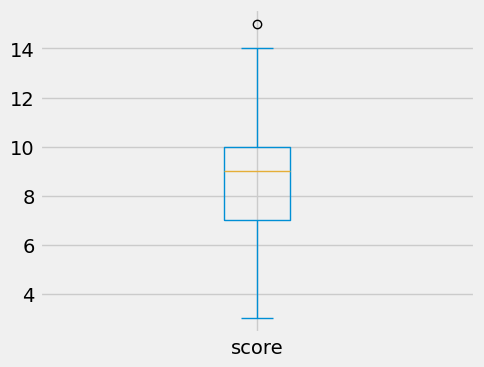

In [27]:
df[['score']].plot(kind='box', figsize=(5, 4),  layout=(4, 5))
plt.show()

In [9]:
df[df['score'] > 14]

,Stud_ID,MCQ1,MCQ2,MCQ3,MCQ4,MCQ5,MCQ6,MCQ7,MCQ8,MCQ9,MCQ10,MCQ11,MCQ12,MCQ13,MCQ14,MCQ15,MCQ16,score,finalGrade7_1
86,20210127,D,B,C,B,D,A,E,E,C,A,A,B,D,C,A,E,15,8.0


In [10]:
def pass_or_fail(finalGrade):
    if finalGrade > 4:
        return 'Pass'
    else:
        return 'Fail'

df['pass_or_fail'] = df['finalGrade7_1'].apply(pass_or_fail)

### Let's Visualize!

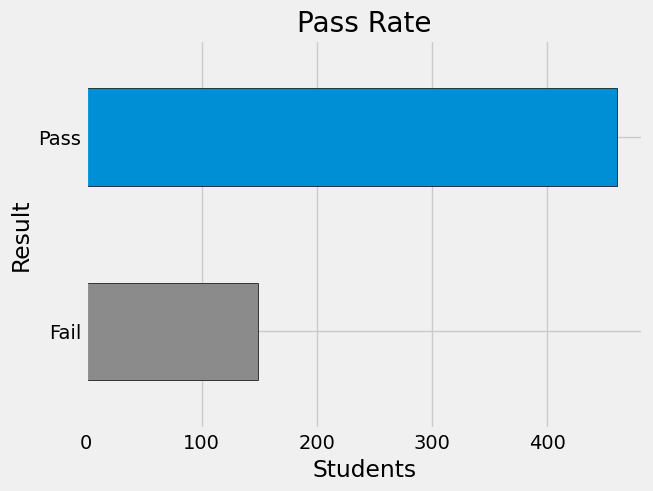

In [64]:
df['pass_or_fail'].value_counts().sort_values() \
    .plot(kind='barh',
          color=[color_pal[4], color_pal[0]],
          edgecolor='black')
plt.title('Pass Rate')
plt.ylabel('Result')
plt.xlabel('Students')
plt.show()

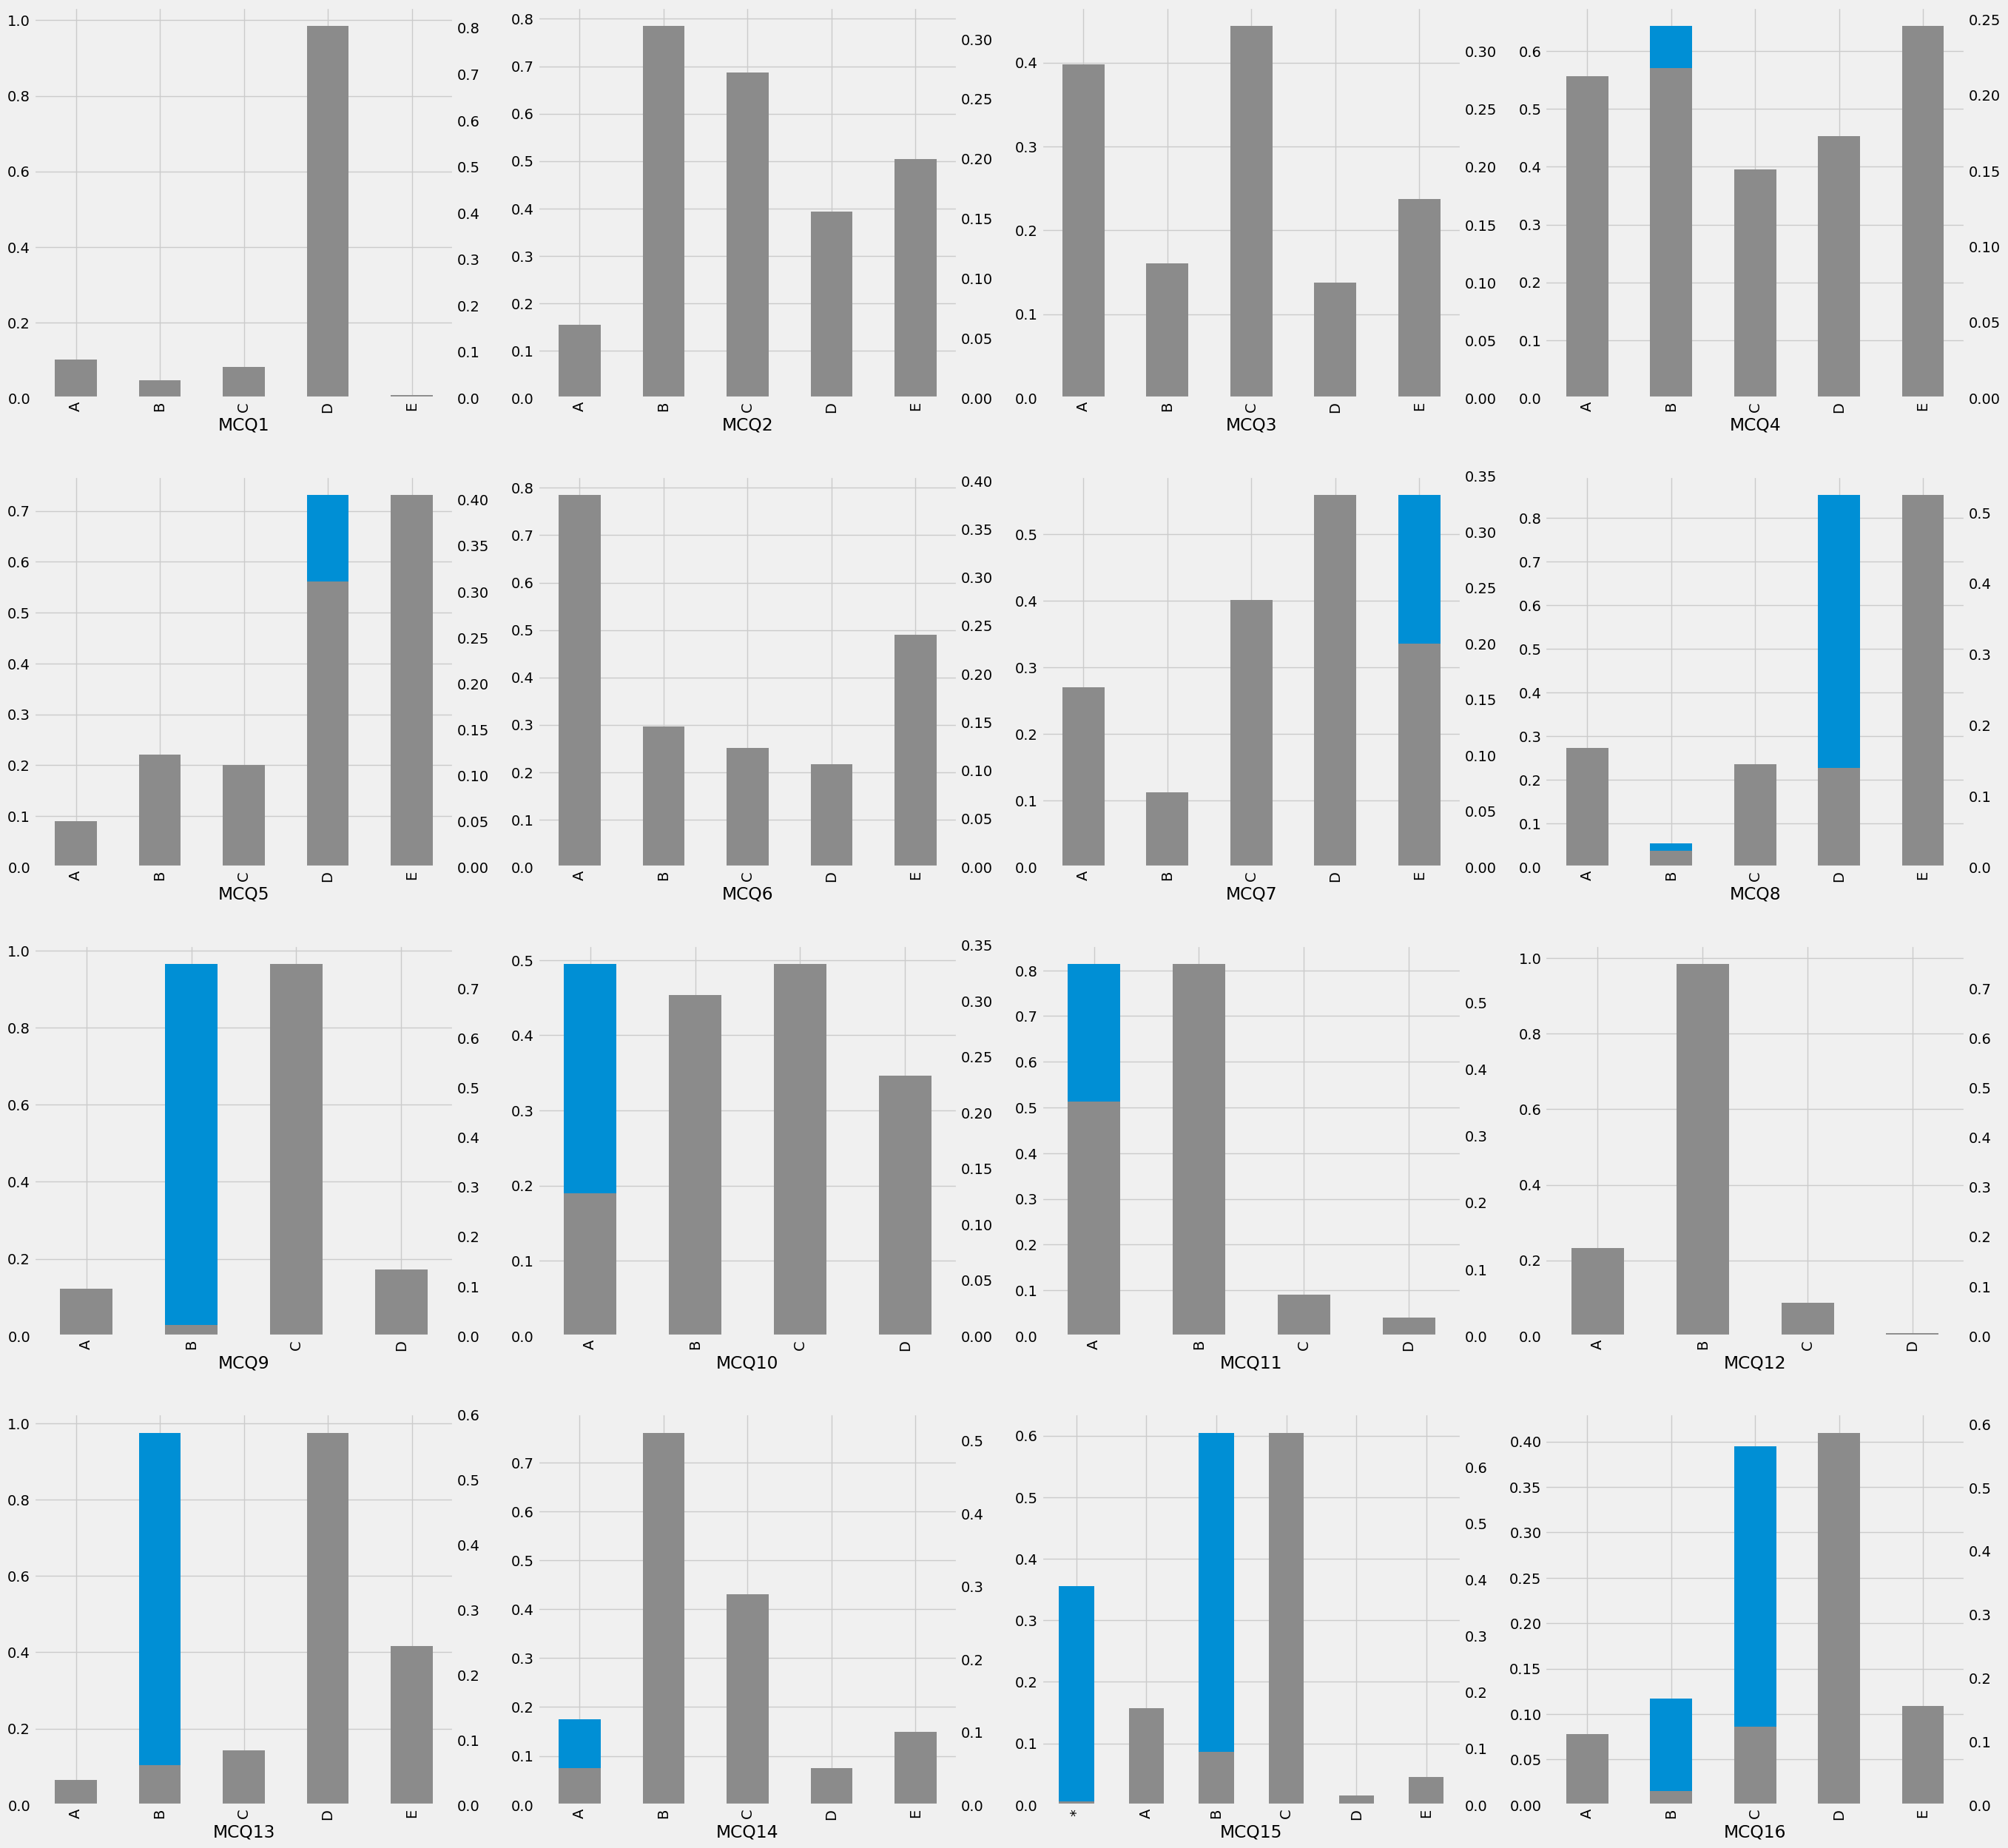

In [67]:
fig, axs = plt.subplots(4, 4, figsize=(30, 30))
axs = axs.flatten()
i = 0
questions = ['MCQ1', 'MCQ2', 'MCQ3', 'MCQ4', 'MCQ5', 'MCQ6', 'MCQ7','MCQ8', 'MCQ9', 'MCQ10', 'MCQ11', 'MCQ12', 'MCQ13', 'MCQ14', 'MCQ15','MCQ16']
for q in questions:
    ax2 = axs[i].twinx()
    top_df[q].value_counts(normalize=True).sort_index(ascending=True) \
        .plot(kind='bar', ax=axs[i])
    bottom_df[q].value_counts(normalize=True).sort_index(ascending=True) \
        .plot(kind='bar', ax=ax2, color=color_pal[4])
    ax2.grid(False)
    i += 1
plt.show()

In [71]:
questions = ['MCQ1', 'MCQ2', 'MCQ3', 'MCQ4', 'MCQ5', 'MCQ6', 'MCQ7','MCQ8', 'MCQ9', 'MCQ10', 'MCQ11', 'MCQ12', 'MCQ13', 'MCQ14', 'MCQ15','MCQ16']
my_list = []
for q in questions:
    q_df = df.groupby(q)['Stud_ID'] \
        .agg('count')
    q_df = q_df.to_frame(name=q)
    my_list.append(q_df)

In [72]:
q_df = pd.concat(my_list, axis=1)
q_df.drop(index=q_df.tail(1).index, inplace=True)
q_df.fillna(0)

,MCQ1,MCQ2,MCQ3,MCQ4,MCQ5,MCQ6,MCQ7,MCQ8,MCQ9,MCQ10,MCQ11,MCQ12,MCQ13,MCQ14,MCQ15,MCQ16
A,25.0,28,184.0,73.0,17.0,349.0,96.0,61.0,37.0,172.0,353.0,44.0,12.0,12.0,165,51.0
B,12.0,357,46.0,262.0,56.0,74.0,27.0,5.0,5.0,150.0,230.0,549.0,14.0,214.0,41,12.0
C,15.0,106,228.0,57.0,49.0,55.0,119.0,67.0,534.0,162.0,15.0,15.0,26.0,311.0,376,81.0
D,555.0,46,63.0,86.0,326.0,38.0,145.0,57.0,33.0,124.0,10.0,1.0,491.0,18.0,4,308.0
E,1.0,71,88.0,130.0,161.0,92.0,221.0,418.0,0.0,0.0,0.0,0.0,66.0,54.0,22,156.0


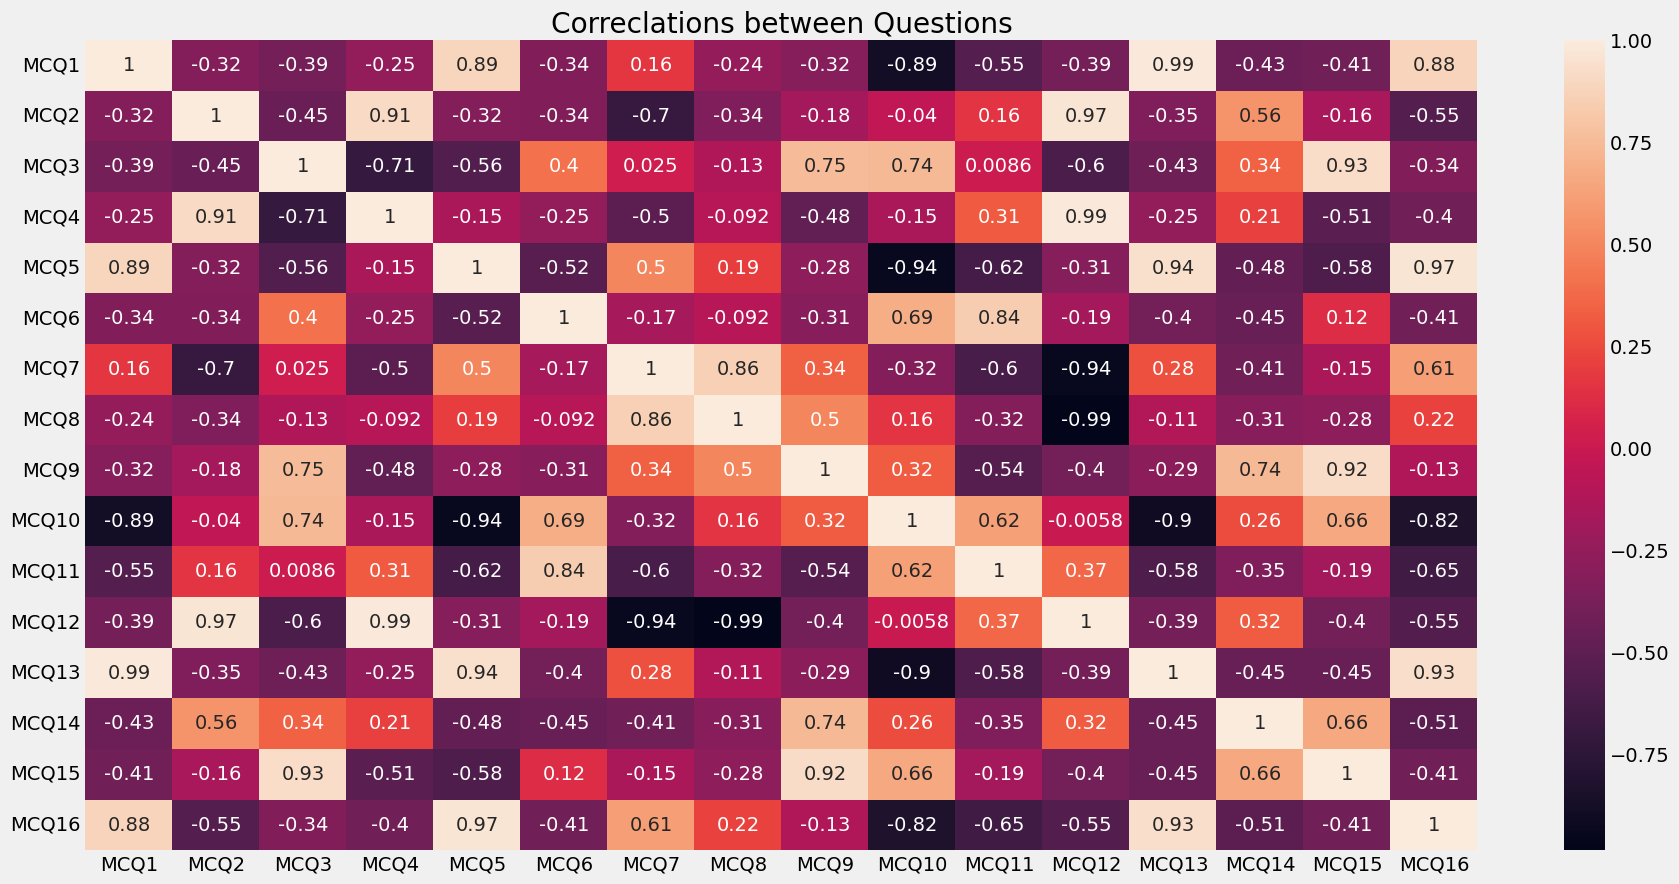

In [86]:
sns.heatmap(q_df.corr(), annot=True)
plt.rcParams["figure.figsize"] = (30, 15)
plt.title('Correclations between Questions')
plt.show()